In [6]:
import numpy as np
from CRR import KernelConformalRidgeRegressor, ConformalRidgeRegressor, ConformalNearestNeighboursRegressor
from martingale import PluginMartingale
from kernels import GaussianKernel, LinearKernel, PolynomialKernel, LinearCombinationKernel, PeriodicKernel
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [7]:
N = 500
p = 5
d = 3
np.random.seed(2024)
X = np.random.uniform(-1, 1, (N, p))
Y = X.sum(axis=1)**d + np.random.normal(0, 0.1, N) # Gaussian noise wiht zero mean and variance 0.1

  0%|          | 0/500 [00:00<?, ?it/s]

0.09


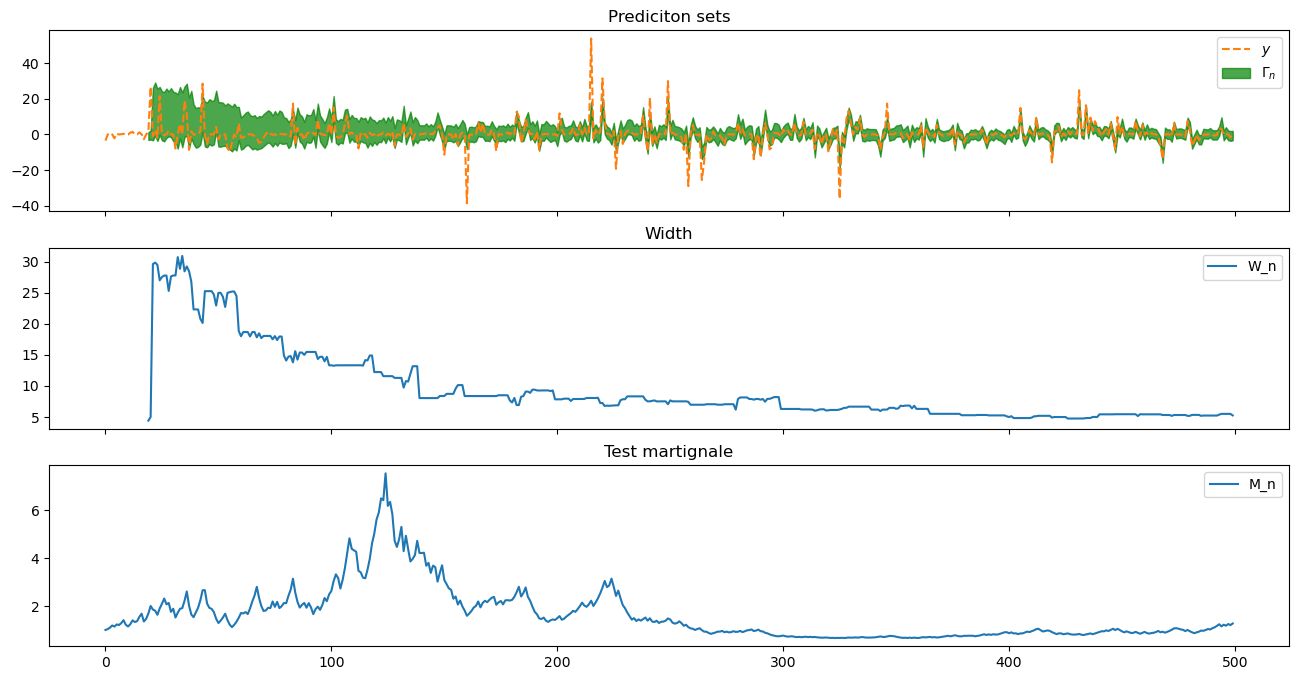

In [8]:
cp = ConformalNearestNeighboursRegressor(k=10, warnings=False)
martingale = PluginMartingale()

Err = 0
p_values = [] # Save the p-values here

predictions = np.empty((X.shape[0], 7))
for i, (obj, lab) in tqdm(enumerate(zip(X, Y)), total=Y.shape[0]):
    # Reality presents the object x
    x = obj
    # Forecaster outputs Gamma
    # Gamma = cp.predict(x, epsilon=0.1, bounds='both', return_update=False)
    # precomputed = None
    Gamma, precomputed = cp.predict(x, epsilon=0.1, bounds='both', return_update=True)
    width = cp.width(Gamma)
    # Reality presents the label
    y = lab
    # Compute the smoothed p-value
    # p = np.random.uniform(0,1)
    p = cp.compute_smoothed_p_value(x, y, precomputed)
    p_values.append(p) # Save the p-value
    # Learn the exampple
    cp.learn_one(x, y, precomputed)  
    # Update test martingale
    martingale.update_log_martingale(p_values)

    # Record if wether we made an error
    err = cp.err(Gamma, y)
    Err += err

    # Save the result from the iteration
    predictions[i, 0] = Gamma[0] # Lower 
    predictions[i, 1] = Gamma[1] # Upper 
    predictions[i, 2] = err # Error
    predictions[i, 3] = lab # True label
    predictions[i, 4] = width # True label
    predictions[i, 5] = p # Smoothed p-value
    predictions[i, 6] = martingale.M # Martingale value

import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(16, 8))
axs[0].plot(Y, label=r'$y$', color='C1', linestyle='--')
axs[0].fill_between(
    x=[i for i, _ in enumerate(Y)],
    y1=predictions[:,0],
    y2=predictions[:,1],
    label=r'$\Gamma_n$',
    color='green',
    alpha=0.7,
)
axs[0].legend()
axs[0].set_title('Prediciton sets')

axs[1].plot(predictions[:,4], label=r'W_n')
axs[1].legend()
axs[1].set_title('Width')

axs[2].plot(predictions[:,6], label=r'M_n')
axs[2].legend()
axs[2].set_title('Test martignale')

print(predictions[:,2].mean())

  0%|          | 0/500 [00:00<?, ?it/s]

0.072


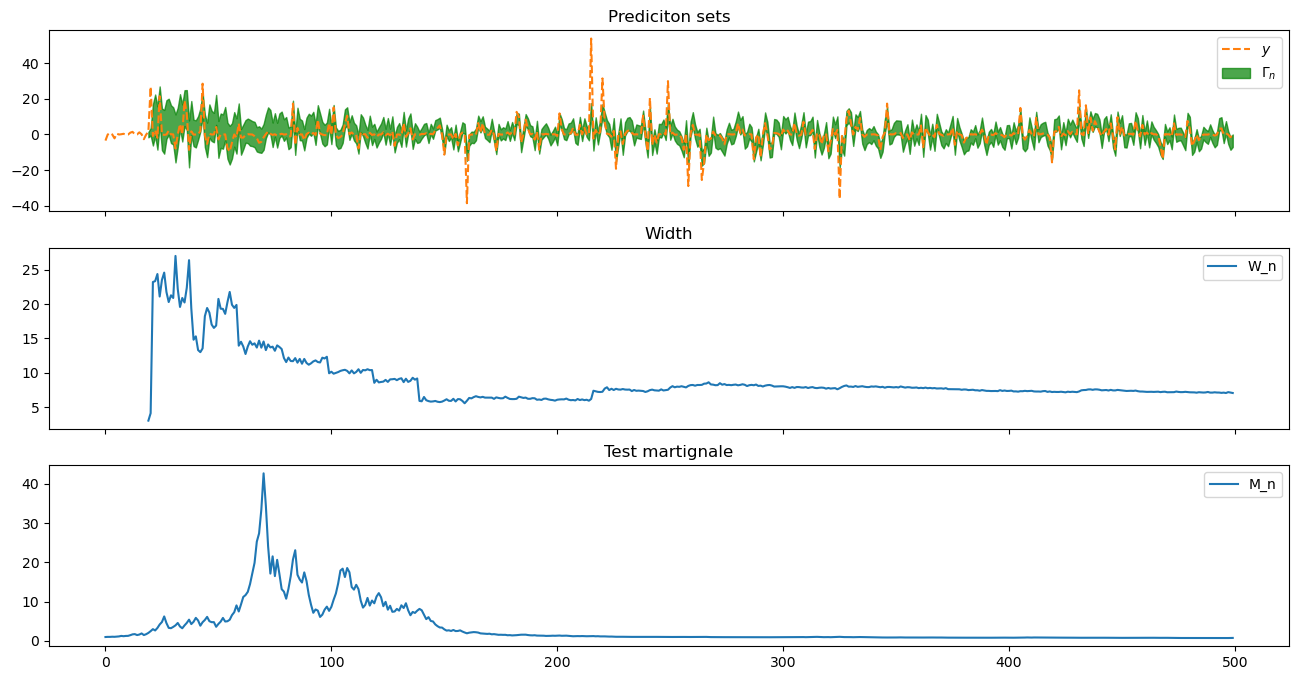

In [9]:
cp = ConformalRidgeRegressor(a=1, warnings=False)
martingale = PluginMartingale()

Err = 0
p_values = [] # Save the p-values here

predictions = np.empty((X.shape[0], 7))
for i, (obj, lab) in tqdm(enumerate(zip(X, Y)), total=Y.shape[0]):
    # Reality presents the object x
    x = obj
    # Forecaster outputs Gamma
    # Gamma = cp.predict(x, epsilon=0.1, bounds='both', return_update=False)
    # precomputed = None
    Gamma, precomputed = cp.predict(x, epsilon=0.1, bounds='both', return_update=True)
    
    width = cp.width(Gamma)
    # Reality presents the label
    y = lab
    # Compute the smoothed p-value
    p = cp.compute_smoothed_p_value(x, y, precomputed)
    p_values.append(p) # Save the p-value
    # Learn the exampple
    cp.learn_one(x, y, precomputed)  
    # Update test martingale
    martingale.update_log_martingale(p_values)

    # Record if wether we made an error
    err = cp.err(Gamma, y)
    Err += err

    # Save the result from the iteration
    predictions[i, 0] = Gamma[0] # Lower 
    predictions[i, 1] = Gamma[1] # Upper 
    predictions[i, 2] = err # Error
    predictions[i, 3] = lab # True label
    predictions[i, 4] = width # True label
    predictions[i, 5] = p # Smoothed p-value
    predictions[i, 6] = martingale.M # Martingale value

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(16, 8))
axs[0].plot(Y, label=r'$y$', color='C1', linestyle='--')
axs[0].fill_between(
    x=[i for i, _ in enumerate(Y)],
    y1=predictions[:,0],
    y2=predictions[:,1],
    label=r'$\Gamma_n$',
    color='green',
    alpha=0.7,
)
axs[0].legend()
axs[0].set_title('Prediciton sets')

axs[1].plot(predictions[:,4], label=r'W_n')
axs[1].legend()
axs[1].set_title('Width')

axs[2].plot(predictions[:,6], label=r'M_n')
axs[2].legend()
axs[2].set_title('Test martignale')

print(predictions[:,2].mean())

  0%|          | 0/500 [00:00<?, ?it/s]

0.102


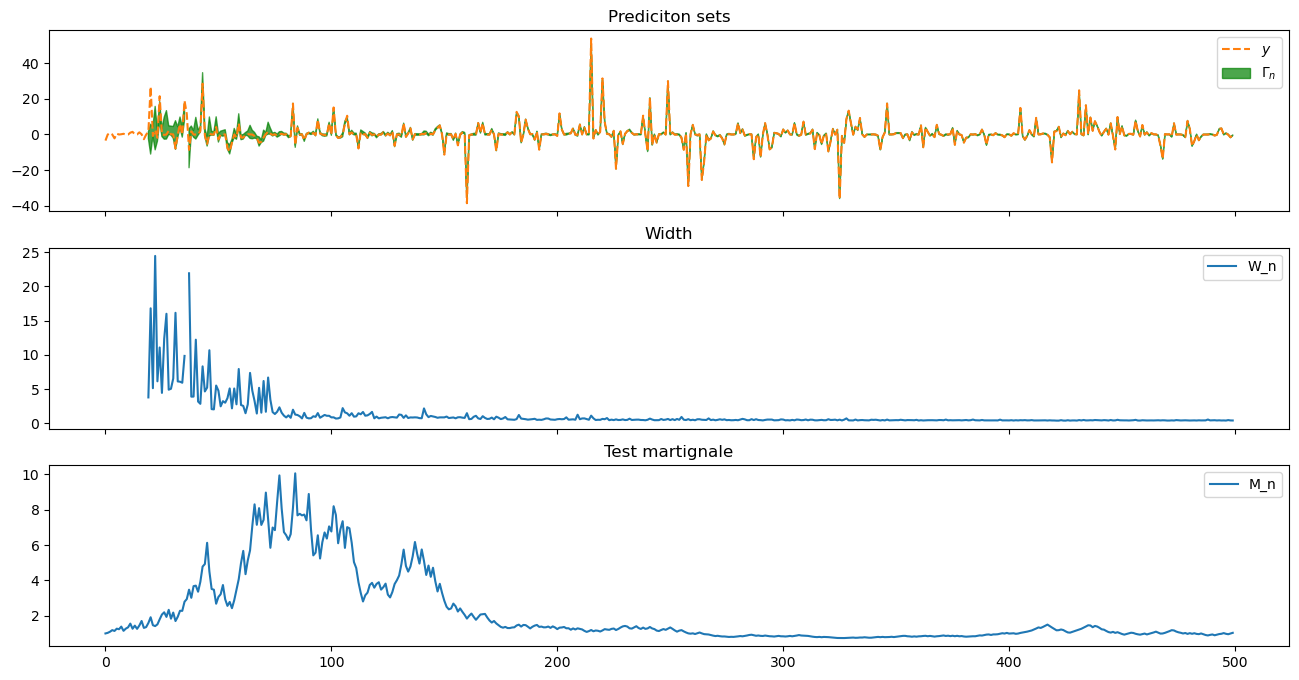

In [10]:
kernel = PolynomialKernel(d, 0)
cp = KernelConformalRidgeRegressor(a=1, warnings=False, kernel=kernel)
martingale = PluginMartingale()

Err = 0
p_values = [] # Save the p-values here

predictions = np.empty((X.shape[0], 7))
for i, (obj, lab) in tqdm(enumerate(zip(X, Y)), total=Y.shape[0]):
    # Reality presents the object x
    x = obj
    # Forecaster outputs Gamma
    # Gamma = cp.predict(x, epsilon=0.1, bounds='both', return_update=False)
    # precomputed = None
    Gamma, precomputed = cp.predict(x, epsilon=0.1, bounds='both', return_update=True)
    
    width = cp.width(Gamma)
    # Reality presents the label
    y = lab
    # Compute the smoothed p-value
    p = cp.compute_smoothed_p_value(x, y, precomputed)
    p_values.append(p) # Save the p-value
    # Learn the exampple
    cp.learn_one(x, y, precomputed)  
    # Update test martingale
    martingale.update_log_martingale(p_values)

    # Record if wether we made an error
    err = cp.err(Gamma, y)
    Err += err

    # Save the result from the iteration
    predictions[i, 0] = Gamma[0] # Lower 
    predictions[i, 1] = Gamma[1] # Upper 
    predictions[i, 2] = err # Error
    predictions[i, 3] = lab # True label
    predictions[i, 4] = width # True label
    predictions[i, 5] = p # Smoothed p-value
    predictions[i, 6] = martingale.M # Martingale value

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(16, 8))
axs[0].plot(Y, label=r'$y$', color='C1', linestyle='--')
axs[0].fill_between(
    x=[i for i, _ in enumerate(Y)],
    y1=predictions[:,0],
    y2=predictions[:,1],
    label=r'$\Gamma_n$',
    color='green',
    alpha=0.7,
)
axs[0].legend()
axs[0].set_title('Prediciton sets')

axs[1].plot(predictions[:,4], label=r'W_n')
axs[1].legend()
axs[1].set_title('Width')

axs[2].plot(predictions[:,6], label=r'M_n')
axs[2].legend()
axs[2].set_title('Test martignale')

print(predictions[:,2].mean())